In [1]:
# This is an Operon Base Run on p312b
# Install libraries
%pip install pyoperon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 65.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 73.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.4/69.4 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.9/386.9 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 8.5 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing install

In [2]:
# Call Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from pyoperon.sklearn import SymbolicRegressor
import time
#import math
import sympy as sym

# Molecular Mass Dataset
Here we will take a first look at the molecular mass dataset, taken from [Goossens.](https://pubs.acs.org/doi/full/10.1021/ie950484l?casa_token=-Vy315d8K38AAAAA%3Anxdm5rReXldLbOrBYLfwm0l3MmsCw_Mbnw1vVdNJ308Ki_3lEcnU3bXQmS8TL2nsArNG-AydRFEKVZc)


In [3]:
# Positron
#df=pd.read_csv('./goossens_raw.csv')
#df=pd.read_csv('./c694/goossens_raw.csv')
#Colab
drive.mount('/content/drive')
df=pd.read_csv('/content/drive/MyDrive/goossens_raw.csv')

Mounted at /content/drive


In [4]:
y=df['MW']
x=df[['SG','TBP']]

In [5]:
t0 = time.time()
myMod=SymbolicRegressor(random_state=7)
myMod.fit(x,y)
y_pred=myMod.predict(x)
print("time to fit: ",time.time() - t0, 'seconds')

time to fit:  12.721498012542725 seconds


### Results
Let's take a peek at how the predicted molecular mass looks compared to the actual:

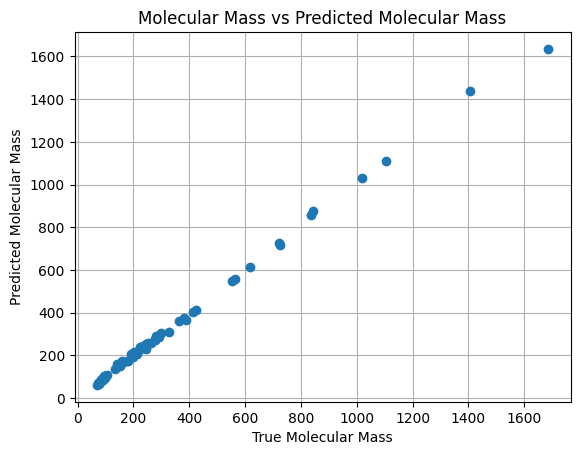

In [6]:
plt.plot(y,y_pred,marker="o",linestyle="None")
plt.xlabel('True Molecular Mass')
plt.ylabel('Predicted Molecular Mass')
plt.title('Molecular Mass vs Predicted Molecular Mass')
plt.grid()
plt.show()

As the correlation looks reasonable, let us take a look at the equation:

In [7]:
myRes = [(s['objective_values'],
    s['tree'],
    s['minimum_description_length'])
    for s in myMod.pareto_front_]
myEq=myMod.get_model_string(myRes[0][1], 12)
print(myEq)

((-40.948307037354) + ((-0.000000003690) * (((((0.138083010912 * X2) * (0.295962333679 * X2)) * ((0.409761786461 * X2) * (0.028229657561 * X2))) / (((-0.107512794435) * X1) / (0.409761786461 * X2))) + (((-1.944571018219) * X2) * (((((((-0.130144447088) * X2) * (0.451494604349 * X2)) + ((((-0.130144447088) * X2) * (0.146136909723 * X2)) + (((-1.886524915695) * X1) * (0.434294492006 * X2)))) + ((2.387439250946 * X2) / (((-0.037290014327) * X2) / ((-0.564548254013) * X2)))) + (((5.816683292389 * X2) / (((-0.037290014327) * X2) / ((-1.558456420898) * X1))) + (((-1.501645445824) * X1) + (1.294148206711 * X2)))) * ((6.283185482025 * X2) / (0.346094757318 * X1)))))))


This looks dramatically different.  Lets us clean it up a bit:

In [8]:
sym.simplify(myEq)

(-40.948307037354*X1 + 6.64831252430807e-12*X2**5 + X2**2*(-1.06728867598018e-7*X1*X2 + 3.14717963395458e-5*X1 - 1.0131976361597e-8*X2**2 + 4.8770124944424e-6*X2))/X1

In [9]:
# Add Prediction to Dataframe
df['Fit_Mw']=y_pred
# Calculate Correlation Coefficient between columns
df.corr()

,SG,TBP,MW,Fit_Mw
SG,1.000000,0.625218,0.334852,0.332750
TBP,0.625218,1.000000,0.869591,0.870386
MW,0.334852,0.869591,1.000000,0.999318
Fit_Mw,0.332750,0.870386,0.999318,1.000000


In [10]:
# Import Hosseinifar Dataset

# Colab Version
#drive.mount('/content/drive')
dfh=pd.read_csv('/content/drive/MyDrive/hosseinifar_raw.csv')
# Positron Version
#dfh=pd.read_csv('./hosseinifar_raw.csv')
# RStudio Version
# dfh=pd.read_csv('./c694/goossens_raw.csv')

In [11]:
# Predict Hosseinifar
yh=dfh['MW']
xh=dfh[['SG','TBP']]
y_hoss=myMod.predict(xh)

In [12]:
# New Correlation Table
dfh['Fit_Mw']=y_hoss
dfh.corr()

,SG,TBP,MW,Fit_Mw
SG,1.000000,0.985561,0.954145,0.963891
TBP,0.985561,1.000000,0.990235,0.994512
MW,0.954145,0.990235,1.000000,0.999235
Fit_Mw,0.963891,0.994512,0.999235,1.000000
